T = 32.5N

In [24]:
import numpy as np
import pandas as pd

import plotly.offline as pyo
import plotly.express as px


pyo.init_notebook_mode()

filenames = ['data/freq_resp_45-55hz_4.5V_processed.csv']

In [25]:
data = []

# Read data files.
for filename in filenames:
    file = pd.read_csv(filename)
    data.append(file[1:])

In [37]:
plot_data = [[], []]

for i, experiment in enumerate(data):
    for j in range(0, len(experiment), 1000):
        try:
            plot_data[i].append(
                {
                    'frequency': experiment['frequency'][j],
                    'displacement_x': np.max(experiment['x_val'][j:j+1000]),
                    'displacement_y': np.max(experiment['y_val'][j:j+1000])
                }
            )
        except Exception:
            pass
    
    plot_data[i] = pd.DataFrame(plot_data[i])

In [39]:
px.scatter(x=plot_data[0]['displacement_y'][290:359], y=plot_data[0]['displacement_x'][290:359])

In [4]:
data_freqs = []
freqs = np.arange(24, 25, 0.1)

for i in freqs:
    div_idx = data[0].index[round(data[0]['frequency'], 5) == round(i, 5)]
    data_freqs.append(data[0][div_idx[0]:div_idx[-1]])

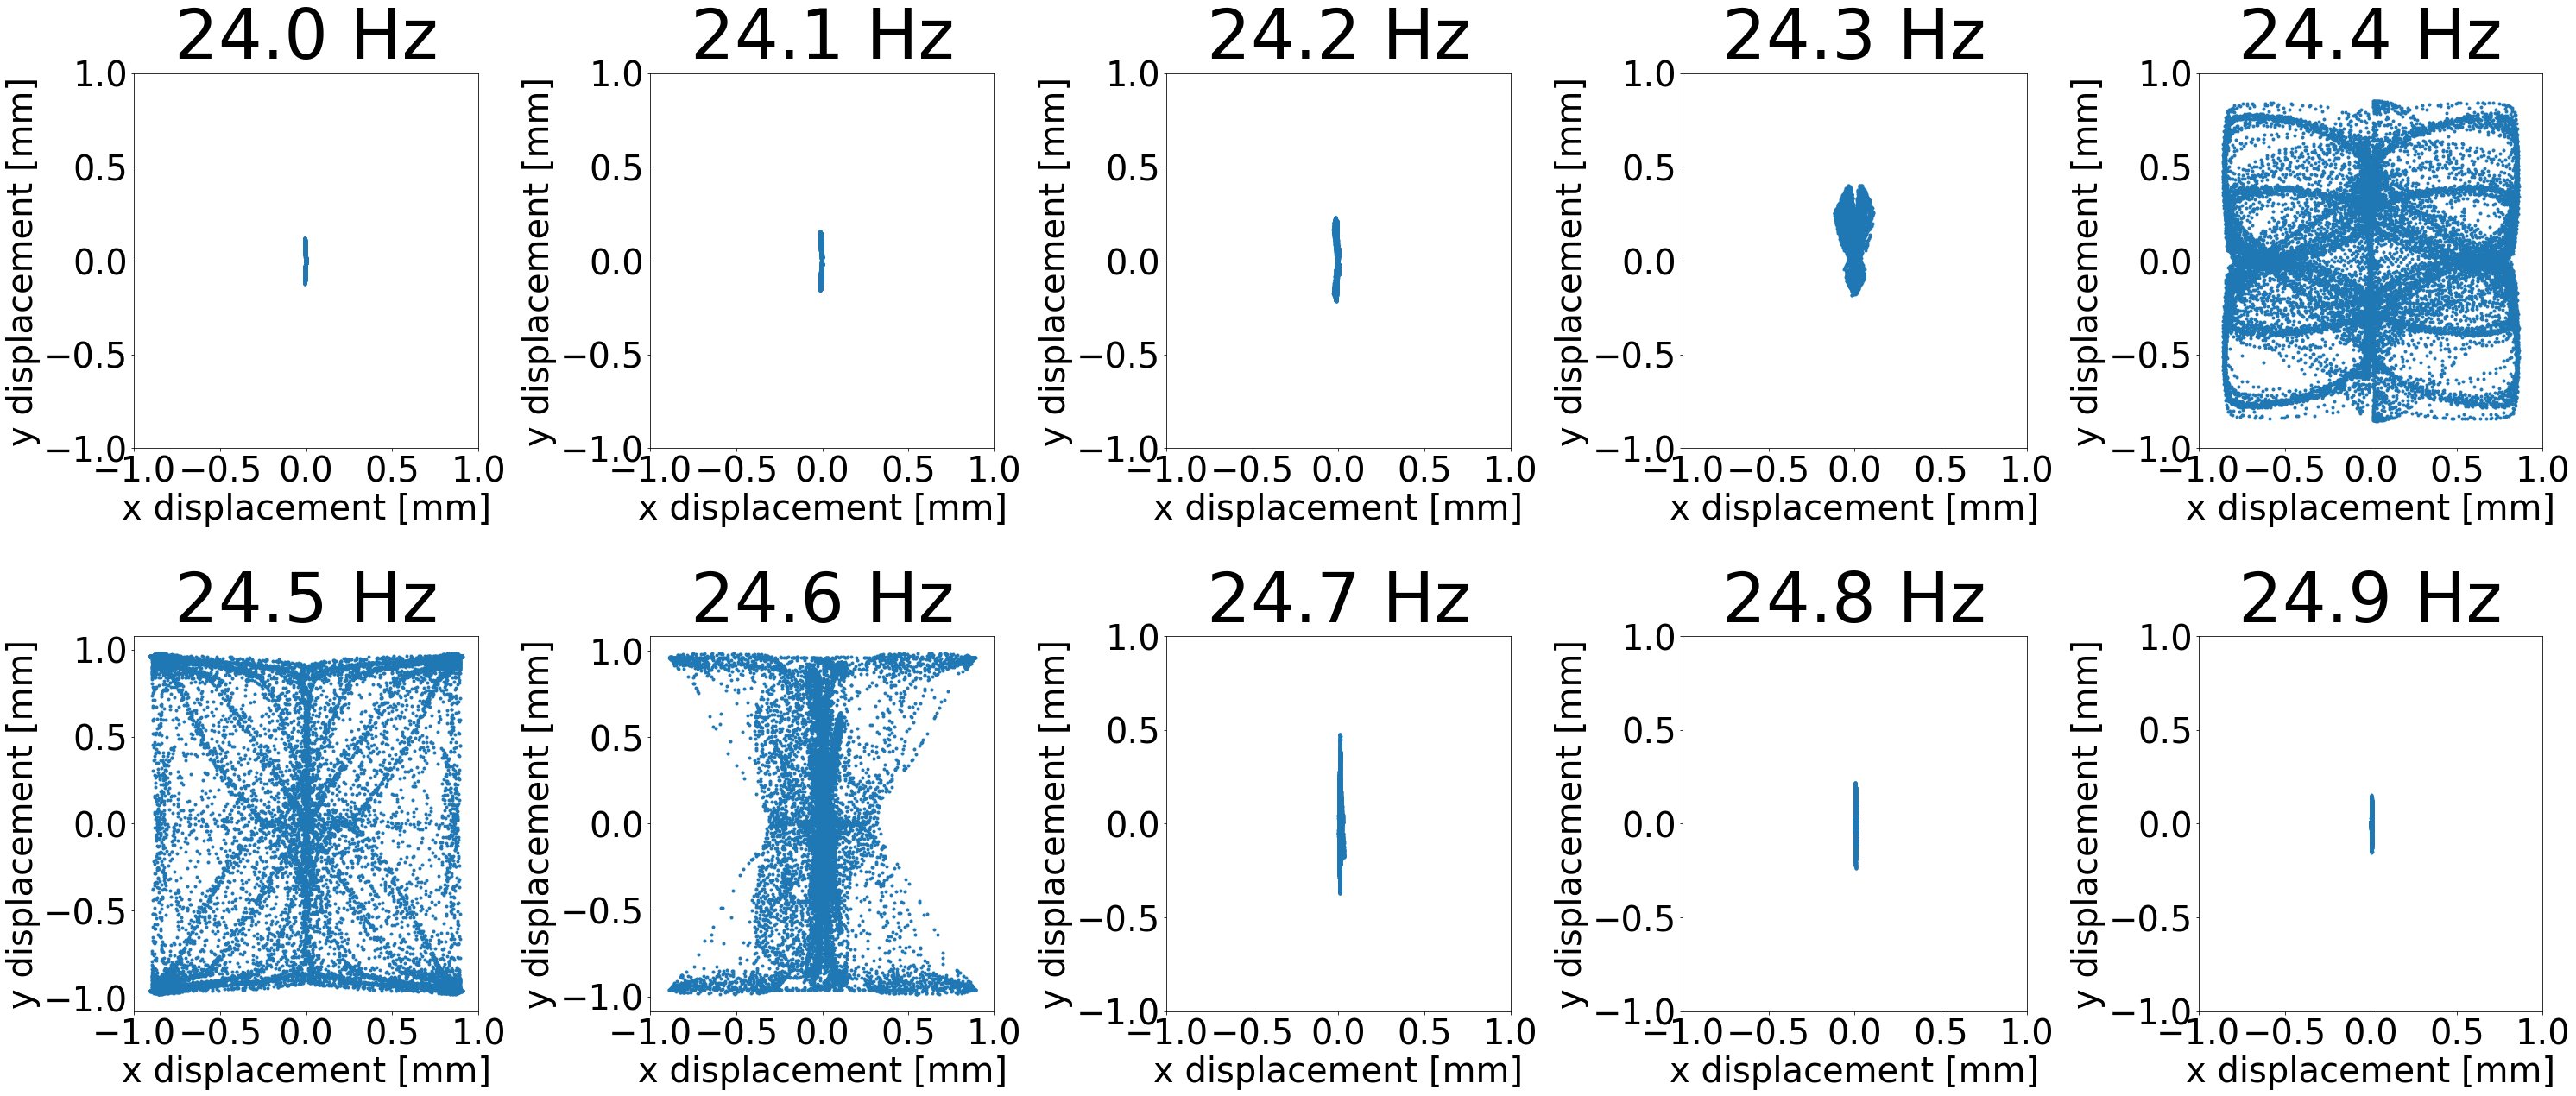

In [6]:
import matplotlib.pyplot as plt
from matplotlib import gridspec

fig = plt.figure()

fig.set_figheight(20)
fig.set_figwidth(50)

spec = gridspec.GridSpec(
    ncols=5,
    nrows=2,
    wspace=0.5,  
    hspace=0.5, 
)

for i in range(len(data_freqs)):
    ax = fig.add_subplot(spec[i])
    ax.plot(data_freqs[i]['x_val'], data_freqs[i]['y_val'], '.')

    ax.set_xlabel('x displacement [mm]', fontsize=40)
    ax.set_ylabel('y displacement [mm]', fontsize=40)
    ax.tick_params(axis='both', labelsize=40)
    ax.set_yticks(np.arange(-1, 1 + 0.1, 0.5))
    ax.set_xticks(np.arange(-1, 1 + 0.1, 0.5))
    ax.title.set_fontsize(80)
    ax.title.set_text(str(round(freqs[i], 1)) + ' Hz')

plt.show()

In [7]:
data_freqs_steady = []

for freq in data_freqs:
    div_idx = freq.index[freq['time'] > freq['time'][freq.first_valid_index()] + 10]
    data_freqs_steady.append(freq.loc[div_idx[0]:])

IndexError: index 3 is out of bounds for GridSpec with size 3

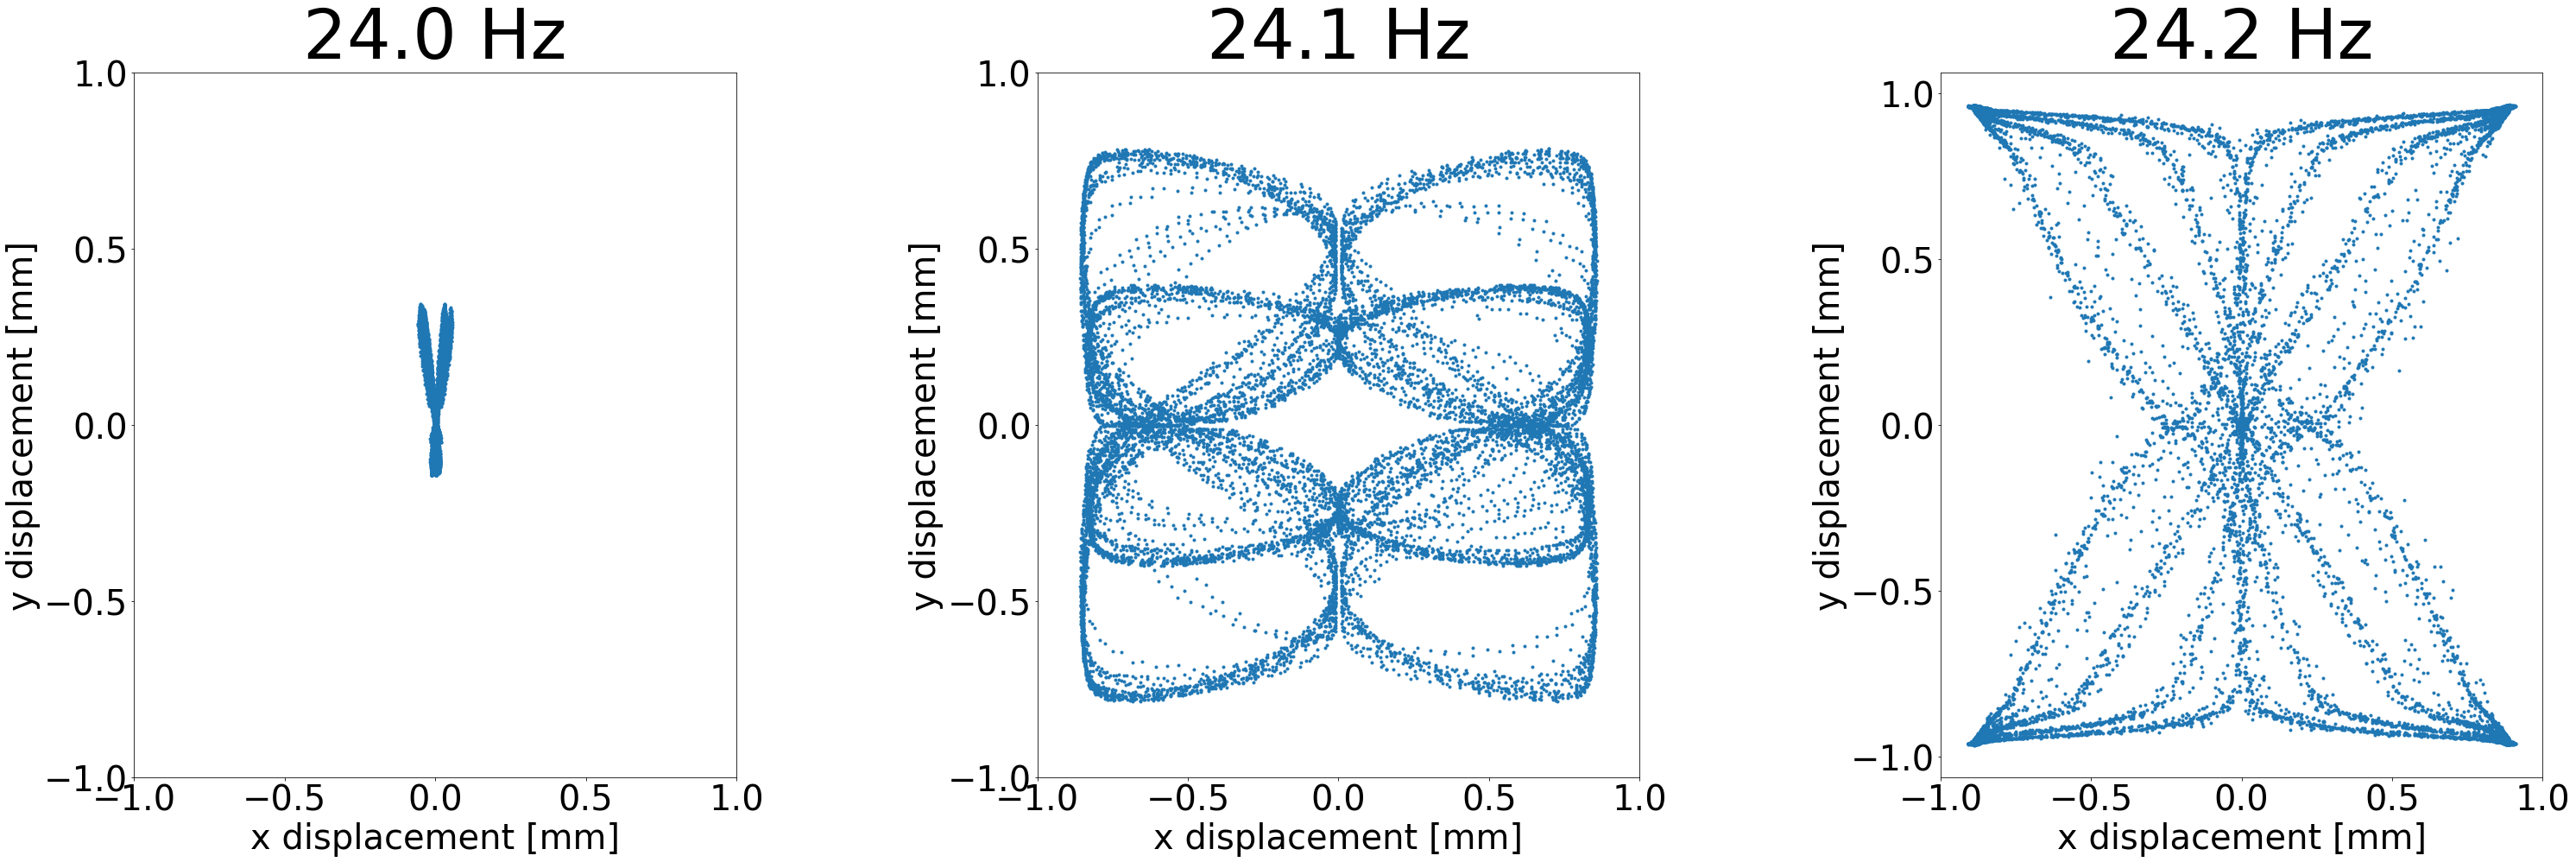

In [8]:
fig = plt.figure()

fig.set_figheight(15)
fig.set_figwidth(50)

spec = gridspec.GridSpec(
    ncols=3,
    nrows=1,
    wspace=0.5,  
    hspace=0.5, 
)

for i in range(len(data_freqs_steady)):
    ax = fig.add_subplot(spec[i])
    ax.plot(data_freqs_steady[i + 3]['x_val'], data_freqs_steady[i + 3]['y_val'], '.')

    ax.set_xlabel('x displacement [mm]', fontsize=40)
    ax.set_ylabel('y displacement [mm]', fontsize=40)
    ax.tick_params(axis='both', labelsize=40)
    ax.set_yticks(np.arange(-1, 1 + 0.1, 0.5))
    ax.set_xticks(np.arange(-1, 1 + 0.1, 0.5))
    ax.title.set_fontsize(80)
    ax.title.set_text(str(round(freqs[i], 1)) + ' Hz')

plt.show()

In [9]:
fig.savefig('xy_maps_steady_state.png')

In [10]:
px.line(x=data_freqs_steady[4]['time'], y=np.abs(data_freqs_steady[4]['x_val']))

In [12]:
for i in range(len(data_freqs)):
    div_idx = data_freqs[i].index[round(data_freqs[i]['time']) == round(data_freqs[i]['time'][data_freqs[i].first_valid_index()] + 10)]
    data_freqs[i] = data_freqs[i].loc[div_idx[0]:]


In [13]:
for i in range(data_freqs_steady[4].first_valid_index(), data_freqs_steady[4].last_valid_index() + 1):
    if abs(data_freqs_steady[4]['y_val'][i]) < 0.05:
        t1 = data_freqs_steady[4]['time'][i]

        for j in range(i + 5, data_freqs_steady[4].last_valid_index() + 1):
            if abs(data_freqs_steady[4]['y_val'][j]) < 0.05:
                t2 = data_freqs_steady[4]['time'][j]
                
                break
        break

print(t1, t2)
t = (t2-t1) * 2
1 / t

430.0253019332886 430.03632259368896


45.369331948771205

In [14]:
from math import pi

freq_x = 42.20810691120108
freq_y = 45.369331948771205

t = np.arange(0, 1, 0.001)

x = np.sin(freq_x * 2*pi * t)
y = np.sin(freq_y * 2*pi * t)